### AutoML test 02: using Optuna library on my GraphAutoencoder model with 2 LAYERS

Output: 

 - For dynamic: **node_embeddings_D_AutoML-2relu**
 
 - For static: **node_embeddings_S_AutoML-2relu.csv**

In [ ]:
# !pip install fastdtw
# !pip install plotly

In [1]:
import os

# Parameters

In [2]:
# # Optimizer
loss_func = "MSE"  # "MSE" (Mean Square Error)   # "MAE" (Mean Absolute Error) #Huber

type_graph_conv = "SAGE"# "SAGE" (WORKS VERY GOOD FOR ARTIFICIAL) # GAT   

data_set = "real" # "real"  "artificial"
TYPE_DATA = 'V3'      

In [4]:
suffix = '25_june_exp_smooth'

output_folder = f'{data_set}/{type_graph_conv}_{suffix}'
os.makedirs(output_folder, exist_ok=True)

# Reading original data

In [5]:
import os
import pandas as pd

if(data_set =="artificial"):
    print("artificial data")
    name_file_dataset = os.path.join("../datasets", "artificial_data_12_clusters_full.csv")
else: # real dataset
    print("real data")
    name_file_dataset = "../datasets/datasubset_nodes_waqar.csv"

df_nodes = pd.read_csv(name_file_dataset) # orignal raw data
df_nodes

real data


,Nodo,2006.01,2006.02,2006.03,2006.04,2006.05,2006.06,2006.07,2006.08,2006.09,...,menores_de_18_anos_taxa,18_a_65_anos_taxa,maiores_de_65_anos_taxa,Pontos_de_onibus,Estacao_de_metro,Estacao_de_trem,Terminal_de_onibus,Favela_proxima,lat,long
0,573641,1,0,0,0,0,0,0,0,0,...,0.210939,0.631893,0.157168,0.0,1.0,3.0,1.0,0.0,-23.562991,-46.703965
1,573643,0,0,0,0,0,0,1,0,1,...,0.169365,0.648065,0.182571,0.0,3.0,3.0,1.0,0.0,-23.567465,-46.702229
2,573644,0,1,0,1,1,0,0,0,0,...,0.125065,0.742215,0.132719,0.0,3.0,3.0,1.0,0.0,-23.572962,-46.699235
3,582438,0,0,0,1,0,0,0,2,0,...,0.125109,0.723529,0.151361,0.0,2.0,2.0,3.0,0.0,-23.528187,-46.661920
4,582442,0,0,0,0,0,0,0,0,0,...,0.147651,0.691275,0.161074,0.0,0.0,2.0,4.0,0.0,-23.517308,-46.656944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,25798409,0,0,0,0,0,0,0,0,0,...,0.266357,0.652312,0.081330,0.0,0.0,4.0,2.0,1.0,-23.507885,-46.712039
14636,25870742,0,0,0,0,0,0,0,0,0,...,0.231285,0.676118,0.092597,0.0,0.0,1.0,2.0,0.0,-23.563471,-46.611300
14637,25871831,0,0,0,0,0,0,0,0,0,...,0.220503,0.686654,0.092843,0.0,3.0,4.0,5.0,0.0,-23.551894,-46.625727
14638,25875949,0,0,0,0,0,0,0,0,0,...,0.229763,0.672624,0.097612,0.0,1.0,3.0,5.0,1.0,-23.521011,-46.637123


#### Dataset management
✅ [Checked] Check 'Pontos_de_onibus' column, it looks like a column of zeros

In [6]:
static_dt = df_nodes.iloc[:, 145:-2]  # Slicing static data
static_dt = static_dt.drop(columns=["Pontos_de_onibus"])

In [7]:
static_dt

,Renda_media_por_domicilio,Renda_media_responsaveis,Responsaveis_sem_renda_taxa,Alfabetizados_de_7_a_15_anos,menores_de_18_anos_taxa,18_a_65_anos_taxa,maiores_de_65_anos_taxa,Estacao_de_metro,Estacao_de_trem,Terminal_de_onibus,Favela_proxima
0,17703.084229,10920.004934,0.066325,0.991071,0.210939,0.631893,0.157168,1.0,3.0,1.0,0.0
1,3331.532558,2068.113256,0.119709,0.906177,0.169365,0.648065,0.182571,3.0,3.0,1.0,0.0
2,12941.995652,9115.711180,0.077019,1.000000,0.125065,0.742215,0.132719,3.0,3.0,1.0,0.0
3,4200.999825,2831.666709,0.037638,0.984375,0.125109,0.723529,0.151361,2.0,2.0,3.0,0.0
4,3433.873684,1614.705263,0.200000,0.956522,0.147651,0.691275,0.161074,0.0,2.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14635,2137.987654,1335.556138,0.053343,0.951042,0.266357,0.652312,0.081330,0.0,4.0,2.0,1.0
14636,3276.852792,2192.850621,0.061859,0.942236,0.231285,0.676118,0.092597,0.0,1.0,2.0,0.0
14637,2020.221106,1153.050251,0.050251,0.913043,0.220503,0.686654,0.092843,3.0,4.0,5.0,0.0
14638,3212.403825,1552.058492,0.114595,0.973069,0.229763,0.672624,0.097612,1.0,3.0,5.0,1.0


## Normalizaing Static data

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
static_dt_norm = pd.DataFrame(scaler.fit_transform(static_dt))
static_dt_norm

,0,1,2,3,4,5,6,7,8,9,10
0,0.384489,0.305902,0.099958,0.991071,0.477077,0.696593,0.400030,0.111111,0.500000,0.142857,0.0
1,0.072357,0.057934,0.180415,0.906177,0.383050,0.714420,0.464686,0.333333,0.500000,0.142857,0.0
2,0.281084,0.255358,0.116075,1.000000,0.282858,0.818211,0.337803,0.333333,0.500000,0.142857,0.0
3,0.091240,0.079323,0.056724,0.984375,0.282958,0.797612,0.385251,0.222222,0.333333,0.428571,0.0
4,0.074579,0.045233,0.301422,0.956522,0.333940,0.762055,0.409972,0.000000,0.333333,0.571429,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14635,0.046434,0.037413,0.080393,0.951042,0.602415,0.719103,0.207006,0.000000,0.666667,0.285714,1.0
14636,0.071169,0.061428,0.093229,0.942236,0.523094,0.745346,0.235681,0.000000,0.166667,0.285714,0.0
14637,0.043877,0.032300,0.075734,0.913043,0.498707,0.756960,0.236309,0.333333,0.666667,0.714286,0.0
14638,0.069769,0.043478,0.172708,0.973069,0.519652,0.741495,0.248447,0.111111,0.500000,0.714286,1.0


In [9]:
static_dt_norm

,0,1,2,3,4,5,6,7,8,9,10
0,0.384489,0.305902,0.099958,0.991071,0.477077,0.696593,0.400030,0.111111,0.500000,0.142857,0.0
1,0.072357,0.057934,0.180415,0.906177,0.383050,0.714420,0.464686,0.333333,0.500000,0.142857,0.0
2,0.281084,0.255358,0.116075,1.000000,0.282858,0.818211,0.337803,0.333333,0.500000,0.142857,0.0
3,0.091240,0.079323,0.056724,0.984375,0.282958,0.797612,0.385251,0.222222,0.333333,0.428571,0.0
4,0.074579,0.045233,0.301422,0.956522,0.333940,0.762055,0.409972,0.000000,0.333333,0.571429,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14635,0.046434,0.037413,0.080393,0.951042,0.602415,0.719103,0.207006,0.000000,0.666667,0.285714,1.0
14636,0.071169,0.061428,0.093229,0.942236,0.523094,0.745346,0.235681,0.000000,0.166667,0.285714,0.0
14637,0.043877,0.032300,0.075734,0.913043,0.498707,0.756960,0.236309,0.333333,0.666667,0.714286,0.0
14638,0.069769,0.043478,0.172708,0.973069,0.519652,0.741495,0.248447,0.111111,0.500000,0.714286,1.0


### Slicing Dynamic data

In [10]:
dynamic_dt_orig = df_nodes.iloc[:, 1:145]  # Slicing dynamic data
dynamic_dt = dynamic_dt_orig
dynamic_dt

,2006.01,2006.02,2006.03,2006.04,2006.05,2006.06,2006.07,2006.08,2006.09,2006.10,...,2017.03,2017.04,2017.05,2017.06,2017.07,2017.08,2017.09,2017.10,2017.11,2017.12
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,1,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
3,0,0,0,1,0,0,0,2,0,0,...,2,2,1,0,0,2,0,1,5,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Normalizaing Dynamic Data

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing
dynamic_dt_smooth = dynamic_dt.apply(lambda x: SimpleExpSmoothing(x, initial_level = 0, initialization_method="known").fit(smoothing_level=0.005, optimized=False).fittedvalues, axis = 1)

In [ ]:
dynamic_dt_smooth_log = np.log1p(np.array(dynamic_dt_smooth))


In [12]:
from sklearn.preprocessing import MinMaxScaler
# Compute global min and max
global_min = dynamic_dt_smooth_log.min().min()
global_max = dynamic_dt_smooth_log.max().max()

# Apply global min-max normalization
dynamic_dt_norm = pd.DataFrame((dynamic_dt_smooth_log - global_min) / (global_max - global_min))
dynamic_dt_norm

,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
0,0.0,0.002336,0.002325,0.002313,0.002302,0.002290,0.002279,0.002267,0.002256,0.002245,...,0.111072,0.110577,0.110084,0.109594,0.109105,0.108618,0.108133,0.107650,0.107169,0.106689
1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002336,0.002325,0.004638,...,0.073981,0.073638,0.073298,0.072958,0.072620,0.072284,0.071949,0.073621,0.073280,0.072941
2,0.0,0.000000,0.002336,0.002325,0.004638,0.006928,0.006894,0.006860,0.006826,0.006792,...,0.145653,0.145027,0.146120,0.145492,0.144867,0.144243,0.145343,0.144717,0.144094,0.145195
3,0.0,0.000000,0.000000,0.000000,0.002336,0.002325,0.002313,0.002302,0.006929,0.006894,...,0.088251,0.091716,0.095139,0.096618,0.096181,0.095746,0.099119,0.098672,0.100123,0.109044
4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.008464,0.008422,0.008380,0.008339,0.008298,0.008256,0.008215,0.008175,0.008134,0.008094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14636,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14637,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14638,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


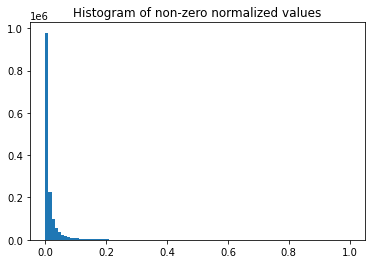

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(np.array(dynamic_dt_norm)[np.array(dynamic_dt_norm) > 0].ravel(), bins=100)
plt.title("Histogram of non-zero normalized values")
plt.show()

# Reading the Static & Dynamic Embeddings

In [36]:
# Load your embeddings CSV
name_file_static_emb = f"../V1/real/SAGE_25_june_exp_smooth_static/node_embeddings_S_AutoML-2_relu_"+ data_set+ "_"+ type_graph_conv +'.csv'
name_file_dynamic_emb = f"../V1/real/SAGE_25_june_exp_smooth/node_embeddings_D_AutoML-2_relu_"+ data_set+ "_"+ type_graph_conv +'.csv'

static_emb_df = pd.read_csv(name_file_static_emb)
dynamic_emb_df = pd.read_csv(name_file_dynamic_emb)

<AxesSubplot:>

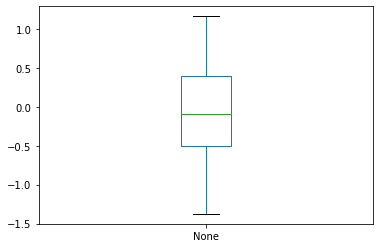

In [37]:
pd.Series(static_emb_df.values.flatten()).plot.box()

In [16]:
# Concatenar horizontalmente
combined_emb = pd.concat([dynamic_emb_df, static_emb_df], axis=1)
combined_emb

,0,1,2,3,4,5,6,7,8,9,...,92,0,1,2,3,4,5,6,7,8
0,0.066906,0.012978,-0.064021,0.027541,-0.030549,-0.017492,0.100954,0.049940,0.098952,0.040769,...,-0.019480,0.418257,-0.463474,-0.464447,-0.783122,-0.868691,-0.473914,0.441379,0.493269,0.390274
1,0.041224,0.005615,-0.097916,0.001312,-0.001022,-0.000612,0.117474,-0.009301,0.007395,0.090179,...,0.026541,0.619088,-0.359816,-0.284881,-0.633024,-0.879334,-0.317535,0.447734,0.549174,0.587168
2,0.095949,0.032602,-0.221022,-0.001713,-0.000320,-0.001601,0.191285,-0.050521,0.051947,0.099600,...,0.030337,0.587328,-0.437012,-0.419924,-0.758469,-0.863517,-0.447545,0.242311,0.583694,0.478925
3,0.042381,0.001182,-0.062676,0.016162,-0.020503,-0.001178,0.100295,0.019741,0.045318,0.067501,...,0.001763,0.435722,-0.195764,-0.358078,-0.585446,-0.818931,-0.479882,0.298477,0.649634,0.656337
4,-0.009646,-0.028842,-0.008268,0.024156,-0.007864,0.023752,0.080108,-0.007108,-0.049581,0.083394,...,0.033244,0.314251,-0.246020,-0.451279,-0.385117,-0.830632,-0.456087,0.347407,0.417100,0.776525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,-0.014592,-0.030967,-0.006956,0.022055,-0.004852,0.025818,0.079390,-0.011984,-0.061228,0.087952,...,0.037915,0.202435,-0.061688,-0.758308,-0.178173,-1.191207,0.159116,0.461193,0.633995,-0.050331
14636,-0.014592,-0.030967,-0.006956,0.022055,-0.004852,0.025818,0.079390,-0.011984,-0.061228,0.087952,...,0.037915,0.272011,-0.018086,-0.261586,-0.560184,-0.787546,-0.428598,0.341080,0.336197,0.467340
14637,-0.011940,-0.034125,-0.007581,0.024847,-0.003995,0.024317,0.082258,-0.004837,-0.055691,0.087115,...,0.031176,0.266388,-0.148303,-0.502745,-0.710671,-0.920540,-0.226178,0.348508,0.692883,0.882212
14638,-0.010018,-0.035650,-0.010614,0.022440,0.000987,0.021600,0.081149,0.001250,-0.057165,0.090435,...,0.029306,0.158527,0.065152,-1.021695,-0.082047,-1.116920,0.080214,0.437894,0.656480,0.199723


## Apply Kmeans on Embeddings

In [18]:
from sklearn.cluster import KMeans

n_clusters = 12

# train K-means 
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(combined_emb)

In [19]:
clusters

array([ 6,  7,  3, ...,  5, 10,  5], dtype=int32)

### TSNE

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# import umap.umap_ as umap

print('data_set' ,data_set)



# Drop non-numeric columns (e.g., node IDs or labels if present)
numeric_cols = combined_emb.select_dtypes(include=[np.number]).columns
combined_emb = combined_emb[numeric_cols]

perplexity = 50
# t-SNE
# tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
tsne = TSNE(
        n_components=2,
        perplexity=perplexity,             # más alto para datos grandes
        n_iter=1500,               # más iteraciones
        learning_rate=300,         # o prueba n_samples/12 = 89240/12 ≈ 7437
        method='barnes_hut',       # eficiente para 2D
        random_state=42,
        verbose=1
    )


data_set real


In [21]:
tsne_result = tsne.fit_transform(combined_emb)

tsne_df = pd.DataFrame(tsne_result)
tsne_df.to_csv(f"{output_folder}/tsne_output_{TYPE_DATA}_{suffix}.csv", index=False)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 14640 samples in 0.002s...
[t-SNE] Computed neighbors for 14640 samples in 3.511s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14640
[t-SNE] Computed conditional probabilities for sample 2000 / 14640
[t-SNE] Computed conditional probabilities for sample 3000 / 14640
[t-SNE] Computed conditional probabilities for sample 4000 / 14640
[t-SNE] Computed conditional probabilities for sample 5000 / 14640
[t-SNE] Computed conditional probabilities for sample 6000 / 14640
[t-SNE] Computed conditional probabilities for sample 7000 / 14640
[t-SNE] Computed conditional probabilities for sample 8000 / 14640
[t-SNE] Computed conditional probabilities for sample 9000 / 14640
[t-SNE] Computed conditional probabilities for sample 10000 / 14640
[t-SNE] Computed conditional probabilities for sample 11000 / 14640
[t-SNE] Computed conditional probabilities for sample 12000 / 14640
[t-SNE] Computed conditional probabilities for sa

### Coloring tsne output using original cluster IDs

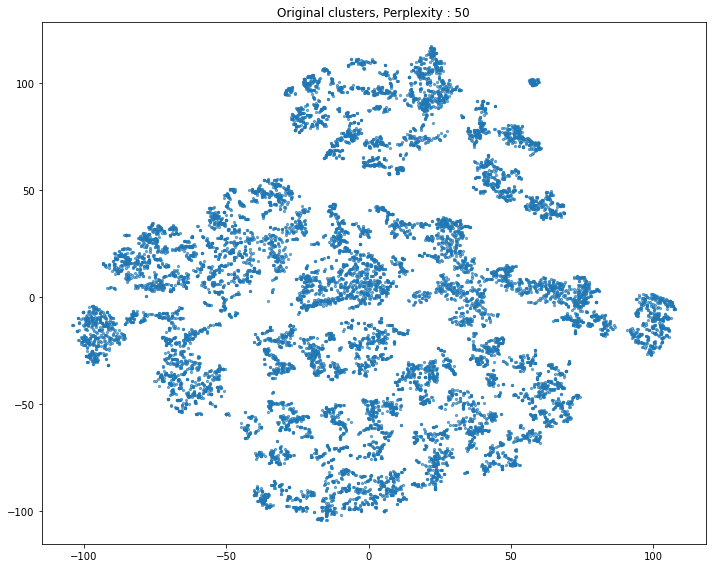

In [22]:
import matplotlib.colors as mcolors

# # Visualization
plt.figure(figsize=(10, 8))
cmap = mcolors.ListedColormap(plt.cm.tab20.colors[8:])
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], 
                      alpha=0.6, s = 5)
# plt.colorbar(scatter, label='Cluster ID')
plt.title(f'Original clusters, Perplexity : {perplexity}')
plt.tight_layout()
plt.savefig(f'{output_folder}/tsne_original_Ids_{TYPE_DATA}_{data_set}_{type_graph_conv}.png', dpi=300) 
plt.show()

In [23]:
# add Kmeans cluster IDs
df_nodes['clusterID_kmeans'] = clusters


### Coloring tsne output using Kmeans cluster IDs

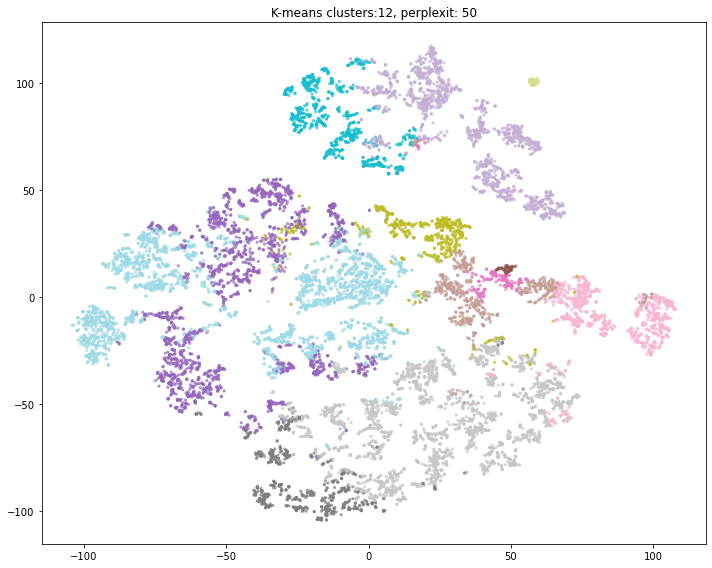

In [24]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], 
                     c=df_nodes['clusterID_kmeans'], cmap=cmap, alpha=0.6, s=5)

plt.title(f'K-means clusters:{n_clusters}, perplexit: {perplexity}')
plt.tight_layout()
plt.savefig(f'{output_folder}/tsne_kmeans_Ids_{TYPE_DATA}_{data_set}_{type_graph_conv}.png', dpi=300) 
plt.show()

In [25]:
# Seleccionar las columnas
columns_to_save = ['Nodo', f'clusterID_kmeans']
df_selected = df_nodes[columns_to_save]

# Crear nombre de archivo
filename = f'to_dissim_clusterID_kmeans_{TYPE_DATA}_{data_set}_{type_graph_conv}.csv'

# Guardar como CSV
df_selected.to_csv(f"{output_folder}/{filename}", index=False)

print(f'Archivo guardado como: {filename}')


Archivo guardado como: to_dissim_clusterID_kmeans_V3_real_SAGE.csv


## Locating clusters using kmeans cluster_ids

In [26]:

from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the data
static_dt_norm_scale = pd.DataFrame(scaler.fit_transform(static_dt_norm), columns=static_dt_norm.columns)
dynamic_dt_norm_scale = pd.DataFrame(scaler.fit_transform(dynamic_dt_norm), columns=dynamic_dt_norm.columns)

In [31]:
from datetime import datetime
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist, pdist
from itertools import combinations
from fastdtw import fastdtw
from multiprocessing import Pool, cpu_count

# # Data type configuration
data_type = "dynamic"   # " dynamic" or static


# Create filename
filepath = f'{output_folder}/{filename}'
print(filepath)

# Open file with columns [Nodo,clusterID_kmeans_] 
df_clusters = pd.read_csv(filepath)
name_column = 'clusterID_kmeans'

if data_type == "static":
    df_features_clusters = pd.concat([static_dt_norm_scale, df_clusters], axis = 1)
else:
    df_features_clusters = pd.concat([dynamic_dt_norm_scale, df_clusters], axis = 1)


# Removing 'Nodo' column
df_features_clusters = df_features_clusters.drop(columns=['Nodo'])

# Group the DataFrame by 'clusterID' and convert each group to a list
listas_por_cluster = [group.drop( name_column, axis=1).values.tolist() for _, group in df_features_clusters.groupby(name_column)]


real/SAGE_25_june_exp_smooth/to_dissim_clusterID_kmeans_V3_real_SAGE.csv


In [32]:
df_features_clusters


,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,clusterID_kmeans
0,0.0,0.102224,0.045675,0.025995,0.016050,0.013124,0.011033,0.009369,0.008537,0.007972,...,0.118645,0.118373,0.117980,0.117587,0.117236,0.116968,0.116618,0.116227,0.115879,6
1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009654,0.008797,0.016471,...,0.079011,0.078817,0.078541,0.078266,0.078019,0.077827,0.079754,0.079474,0.079223,7
2,0.0,0.000000,0.045904,0.026125,0.032343,0.039705,0.033379,0.028346,0.025829,0.024120,...,0.155608,0.157123,0.156625,0.156129,0.155688,0.157217,0.156773,0.156274,0.157701,3
3,0.0,0.000000,0.000000,0.000000,0.016292,0.013322,0.011200,0.009511,0.026218,0.024483,...,0.098408,0.102302,0.104011,0.103658,0.103343,0.107218,0.106892,0.108585,0.118436,8
4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.009037,0.009011,0.008977,0.008943,0.008911,0.008887,0.008856,0.008822,0.008791,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10
14636,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11
14637,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5
14638,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10


# Calculation of distances

In [33]:
# listas_por_cluster.shape

In [34]:

# ===================
# subsampling at 10%
# ===================

import random
sub_listas_por_cluster = []
max_samples = 200  # set your maximum threshold here

for lista in listas_por_cluster:
    n = len(lista)
    muestra_size = min(max_samples, max(1, int(0.05 * n)))  # limit the sample size
    muestra = random.sample(lista, muestra_size) if n >= muestra_size else lista.copy()
    sub_listas_por_cluster.append(muestra)

for idx, sublista in enumerate(sub_listas_por_cluster):
    print(f"Cluster {idx}: {len(sublista)} samples")

# ===================
# DISTANCE FUNCTIONS
# ===================
def average_intra_cluster_distance(X_cluster, data_type='static'):
    n = len(X_cluster)
    if n <= 1:
        return 0.0
    if data_type == 'static':
        return np.mean(pdist(X_cluster, 'euclidean'))
    elif data_type == 'dynamic':
        distances = []
        for i in range(n):
            for j in range(i + 1, n):
                dist, _ = fastdtw(X_cluster[i], X_cluster[j])
                distances.append(dist)
        return np.mean(distances)
    else:
        raise ValueError("data_type must be either 'static' or 'dynamic'")

def minimum_inter_cluster_distance(X_cluster_i, X_cluster_j, data_type='static'):
    if len(X_cluster_i) == 0 or len(X_cluster_j) == 0:
        return np.inf
    if data_type == 'static':
        dist_matrix = cdist(X_cluster_i, X_cluster_j, 'euclidean')
    elif data_type == 'dynamic':
        dist_matrix = np.zeros((len(X_cluster_i), len(X_cluster_j)))
        for i in range(len(X_cluster_i)):
            for j in range(len(X_cluster_j)):
                dist, _ = fastdtw(X_cluster_i[i], X_cluster_j[j])
                dist_matrix[i, j] = dist
    else:
        raise ValueError("data_type must be either 'static' or 'dynamic'")
    return np.min(dist_matrix)

def compute_cluster_dissimilarity2(a_i, a_j, b_ij):
    denom1 = np.maximum(a_i, b_ij)
    term1 = np.divide(b_ij - a_i, denom1, out=np.zeros_like(np.array([b_ij])), where=(denom1 != 0))
    denom2 = np.maximum(a_j, b_ij)
    term2 = np.divide(b_ij - a_j, denom2, out=np.zeros_like(np.array([b_ij])), where=(denom2 != 0))
    return 0.5 * (term1 + term2)

def compute_pair_dissimilarity(args):
    i, j, clusters, data_type = args
    a_i = average_intra_cluster_distance(clusters[i], data_type)
    a_j = average_intra_cluster_distance(clusters[j], data_type)
    b_ij = minimum_inter_cluster_distance(clusters[i], clusters[j], data_type)
    S_ij = compute_cluster_dissimilarity2(a_i, a_j, b_ij)
    return (i, j, S_ij)

def compute_all_cluster_dissimilarities(clusters, data_type='static'):
    n = len(clusters)
    S = np.zeros((n, n))

    args_list = [(i, j, clusters, data_type) for i, j in combinations(range(n), 2)]

    with Pool(processes=cpu_count()) as pool:
        results = pool.map(compute_pair_dissimilarity, args_list)

    for i, j, S_ij in results:
        S[i, j] = S[j, i] = S_ij

    print("Matriz de disimilitudes:\n", S)
    return S

# ===================
# Execution
# ===================

time_start = datetime.now()
print('time_start', time_start.strftime("%H:%M:%S"), 'para', data_type)

if data_type == "static":
    D = compute_all_cluster_dissimilarities(listas_por_cluster, data_type=data_type)
else: # cross clustering option
    D = compute_all_cluster_dissimilarities(sub_listas_por_cluster, data_type=data_type)
    
time_end = datetime.now()
print(time_start.strftime("%H:%M:%S"), '-', time_end.strftime("%H:%M:%S"))

elapsed_time = (time_end - time_start).total_seconds()
print('Elapsed time:', str(elapsed_time), 'seconds')


Cluster 0: 120 samples
Cluster 1: 88 samples
Cluster 2: 2 samples
Cluster 3: 29 samples
Cluster 4: 8 samples
Cluster 5: 49 samples
Cluster 6: 42 samples
Cluster 7: 143 samples
Cluster 8: 33 samples
Cluster 9: 3 samples
Cluster 10: 48 samples
Cluster 11: 160 samples
time_start 11:03:17 para dynamic
Matriz de disimilitudes:
 [[ 0.         -1.          0.47020012 -0.60806246  0.63959955 -0.9999521
  -1.         -1.         -0.9982522  -0.99988234 -1.         -1.        ]
 [-1.          0.          0.40729352 -0.85991708  0.15904412 -0.99998217
  -0.99992312 -1.         -0.99995355 -0.99734602 -1.         -1.        ]
 [ 0.47020012  0.40729352  0.          0.34842635 -0.83574811  0.42308189
   0.44652419  0.49337184  0.38970734  0.55004191  0.3548348   0.48669819]
 [-0.60806246 -0.85991708  0.34842635  0.         -0.71246161 -0.87848478
  -0.58382744 -0.24835582 -0.85657248  0.6147961  -0.81937355 -0.11155394]
 [ 0.63959955  0.15904412 -0.83574811 -0.71246161  0.          0.38259077
   0.6

In [35]:
df = pd.DataFrame(D)
# df.to_csv(f'outputs/cluster_dissimilarities_matrix_{data_set}_v3_{data_type}.csv', index=False)
# df.to_csv(f'outputs/cluster_dissimilarities_matrix_{TYPE_DATA}_{data_set}_{data_type}_{type_graph_conv}.csv', index=False)

df.to_csv(f'{output_folder}/cluster_dissimilarities_matrix_{TYPE_DATA}_{data_set}_{data_type}_{type_graph_conv}.csv', index=False)

print(f'Final result: cluster_dissimilarities_matrix_{TYPE_DATA}_{data_set}_{data_type}_{type_graph_conv}.csv')

Final result: cluster_dissimilarities_matrix_V3_real_dynamic_SAGE.csv
